In [2]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import scipy.stats

In [3]:
file1="/mnt/store/hlt/Work/MultiWSI/hom/en/embed/neelakantan.umbc.txt"
file2="/mnt/store/hlt/Work/MultiWSI/hom/en/embed/neelakantan.NP-MSSG.50D.30K.txt"
x1, x2 = [{parts[0]:float(parts[1]) for parts in [line.strip().split("\t") for line in open(f)]} for f in [file1, file2]]
keys = set(x1.keys()) & set(x2.keys())
x = numpy.array([x1[k] for k in keys])
y = numpy.array([x2[k] for k in keys])
p = scipy.stats.pearsonr(x, y)[0]
s = scipy.stats.spearmanr(x, y, )[0]
# logs = [line.strip().split() for line in open(model_name + ".log")][-3:]
# label = file1 + " vs " + file2 + (" Spearman %f, Pearson %f" % (s, p))

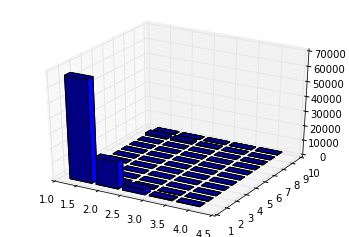

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = numpy.histogram2d(x, y, bins=[int(max(x)) + 1, int(max(y)) + 1])

elements = (len(xedges) - 1) * (len(yedges) - 1)
xpos, ypos = numpy.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = numpy.zeros(elements)
dx = 0.5 * numpy.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

plt.show()